In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('D:\Spam Ham Classification\\notebook\data\spam.csv',encoding='ISO-8859-1')
df.shape

(5572, 5)

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [3]:
df.shape

(5572, 5)

In [4]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

### Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.rename(columns={"v1":"target","v2":"Text"},inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["target"]=encoder.fit_transform(df["target"])
df


,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [8]:
df.isnull().sum()

target    0
Text      0
dtype: int64

In [9]:
df.duplicated().sum()

403

In [10]:
df.drop_duplicates(inplace=True, keep = "first")

In [11]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

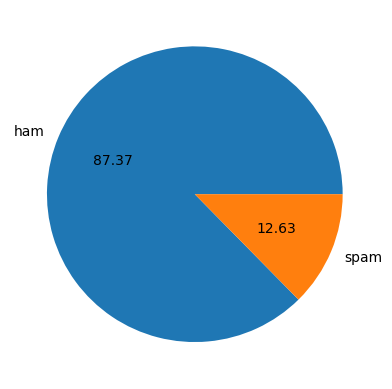

In [12]:
import matplotlib.pyplot as plt 
plt.pie(df.target.value_counts(),labels = ["ham", "spam"], autopct="%0.2f")
plt.show()

In [13]:
!pip install nltk

In [14]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:


d1 = {"num_characters": len, "num_words": lambda x: len(nltk.word_tokenize(x)),
      "num_sentences": lambda x: len(nltk.sent_tokenize(x))}

for col, func in d1.items():
    df[col] = df["Text"].apply(func)

df


,target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [16]:
# Spam 
df[df["target"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [17]:
#ham
df[df["target"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


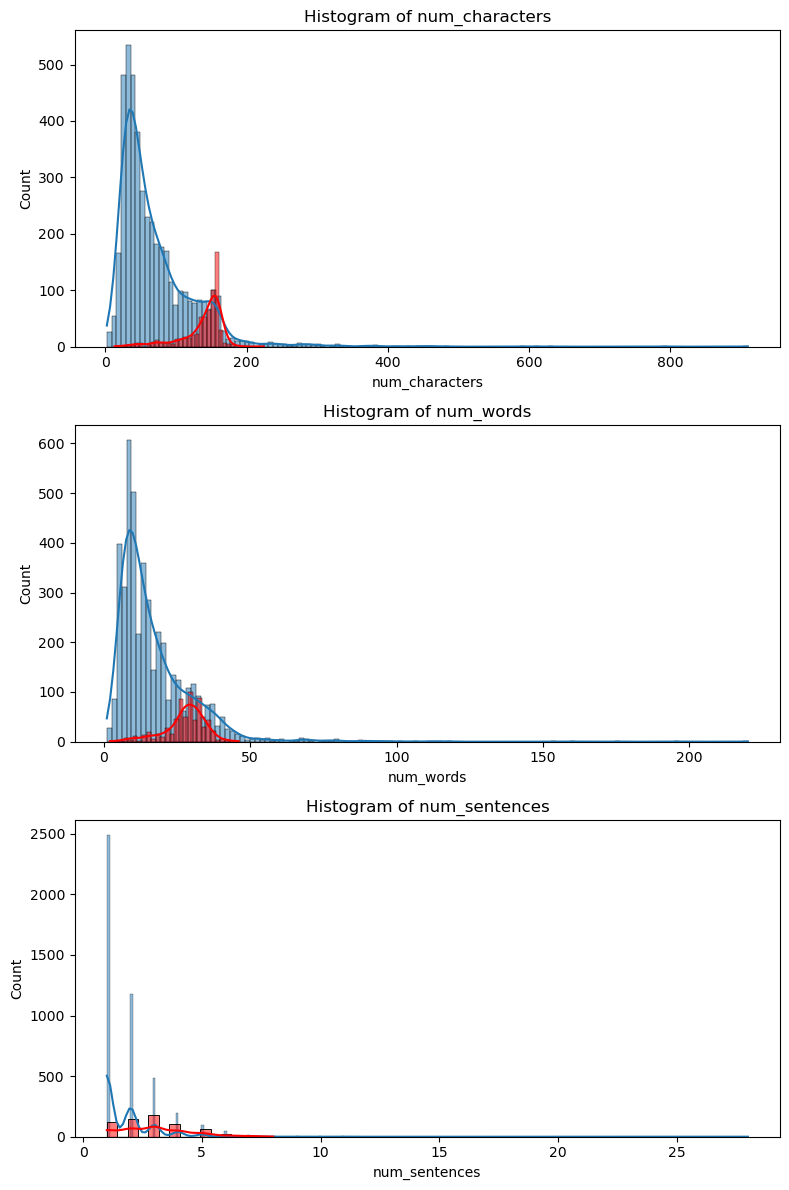

In [18]:
import seaborn as sns
fig,axes = plt.subplots(nrows=3, ncols=1,figsize =(8,12))
# List of column names
columns_to_plot = ['num_characters', 'num_words', 'num_sentences']

for i,col in enumerate(columns_to_plot):
    sns.histplot(data = df[df["target"]==0], x = col, ax = axes[i],kde = True)
    sns.histplot(data= df[df["target"]==1],x=col, ax = axes[i], color="red", kde = True)
    axes[i].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

<AxesSubplot:>

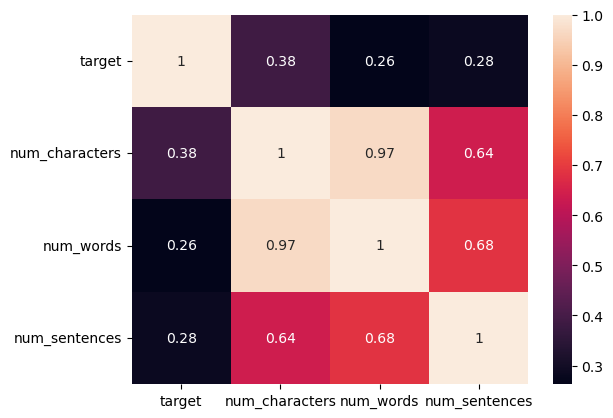

In [19]:
sns.heatmap(df.corr(), annot = True)

## Data Preprocessing

In [20]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [21]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer, PorterStemmer


ps = PorterStemmer()
lem = WordNetLemmatizer()

def transform(text):
    y = []
    text = text.lower()
    text = nltk.word_tokenize(text)

    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    '''
    #### Steming if data is huge and model need speed ####
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))'''

    text = y[:]
    y.clear()
    for i in text:
        y.append(lem.lemmatize(i))

    return ' '.join(y)

# Example usage:
sample_text = "This is a sample text with some stop words and punctuation, such as commas and periods."
transformed_text = transform(sample_text)
print(transformed_text)


sample text stop word punctuation comma period


In [22]:
df["Transform Text"] = df["Text"].apply(transform)

In [23]:
df

,target,Text,num_characters,num_words,num_sentences,Transform Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tried 2 contact u pound prize 2 claim...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,pity mood suggestion
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitching acted like interested buying some...


In [24]:
!pip install wordcloud

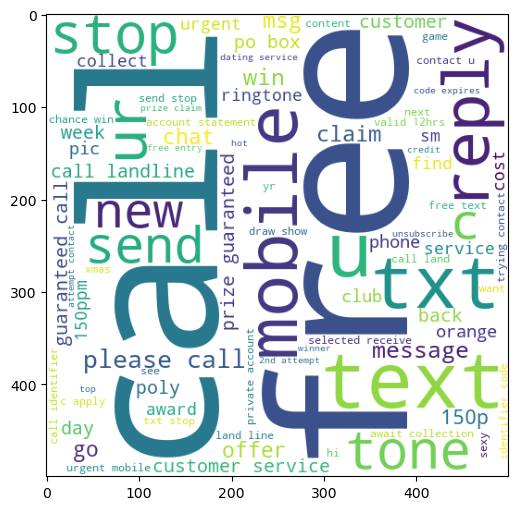

In [25]:
# spam message most frequently used words
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
wc.generate(df[df["target"]==1]["Transform Text"].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(wc)


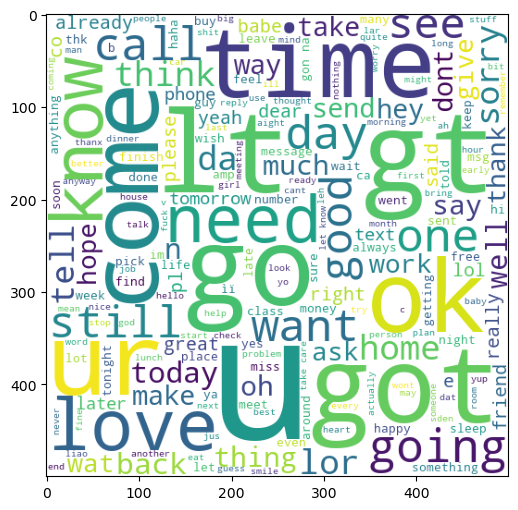

In [26]:
# Ham message most frequently used words
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
wc.generate(df[df["target"]==0]["Transform Text"].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(wc)

In [27]:
ham_corpus = []
for msg in df[df["target"]==0]["Transform Text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

spam_corpus = []
for msg in df[df["target"]==1]["Transform Text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [28]:
print(len(spam_corpus))
print(len(ham_corpus))

9939
35394


In [29]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,313
1,free,191
2,2,155
3,txt,130
4,u,126
5,text,121
6,ur,119
7,mobile,114
8,stop,104
9,claim,98


c:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


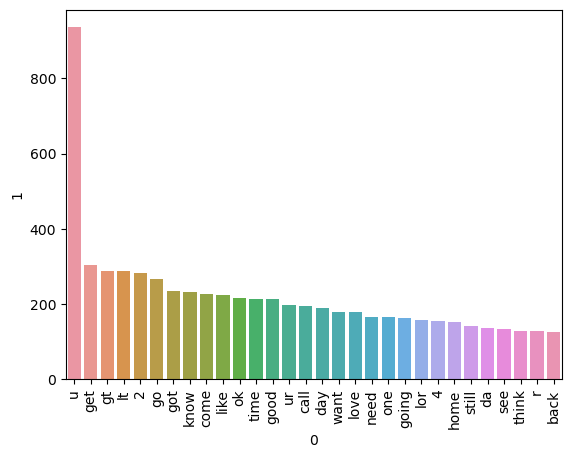

In [30]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


c:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


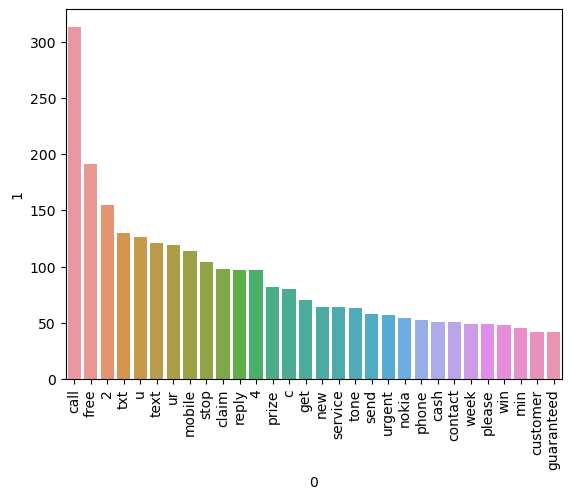

In [31]:

from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [65]:
df.to_csv("D:\Spam Ham Classification\\notebook\data\\transformed_data.csv", index=False)


In [48]:
from sklearn.feature_extraction.text import  CountVectorizer, TfidfVectorizer
BOW = CountVectorizer()
TFIDF = TfidfVectorizer()

X = BOW.fit_transform(df["Transform Text"]).toarray()
X


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [70]:
# 5169= SMS , 7490 = Words
X.shape

(5169, 7490)

In [71]:

y = df['target'].values


In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [73]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8945841392649904
[[807  89]
 [ 20 118]]
0.5700483091787439


In [74]:

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9632495164410058
[[870  26]
 [ 12 126]]
0.8289473684210527


In [115]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9690522243713733
[[893   3]
 [ 29 109]]
0.9732142857142857


In [118]:
!pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 2.2 MB/s eta 0:00:00
  Using cached numpy-1.24.4-cp39-cp39-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.3
    Uninstalling numpy-1.26.3:
      Successfully uninstalled numpy-1.26.3


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ACER\\anaconda3\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost 


ModuleNotFoundError: No module named 'xgboost'

In [121]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = xgboost.XGBClassifier(n_estimators=50,random_state=2)

NameError: name 'xgboost' is not defined